In [4]:
s='abcdefg'
print s[-1]

g


In [5]:
a=[[1,2,3]]*3     #二三行仅仅只是引用了第一行的[1,2,3]
a[1][1]=100
print(a)

[[1, 100, 3], [1, 100, 3], [1, 100, 3]]


In [6]:
a=[[1,2,3] for i in range(3)]
a[1][1]=100
print(a)

[[1, 2, 3], [1, 100, 3], [1, 2, 3]]


In [8]:
x=range(10)
for i in x:
    print(i)

0
1
2
3
4
5
6
7
8
9


In [14]:
def fib(limit):
    n,a,b=0,0,1
    while n<limit:
        yield b
        a,b=b,a+b
        n+=1
    #return 'done'

for i in fib(10):
    print(i)

1
1
2
3
5
8
13
21
34
55


In [15]:
class MyClass:                    #类后面可以加上继承的基类，默认所有的类都继承自Object类，可以不写
    def __init__(self,val):        #初始化函数，而非构造函数    
        self.val=val
    def display(self,s):
        print('%s:%d' %(s,self.val))
m=MyClass(100)
print(m.val)
m.display('hello')
print('')

m2=m
print(id(m))
print(id(m2))

fn=m.display
fn('hey')


100
hello:100

148578376
148578376
hey:100


In [18]:
import traceback

try:
    print('try...')
    r = 10 / 0
except ZeroDivisionError, e:
    print('ZeroDivisionError:', e)
    print(traceback.print_exc())
finally:
    print('finally...')

try...
('ZeroDivisionError:', ZeroDivisionError('integer division or modulo by zero',))
None
finally...


Traceback (most recent call last):
  File "<ipython-input-18-d0522b03d431>", line 5, in <module>
    r = 10 / 0
ZeroDivisionError: integer division or modulo by zero


In [20]:
import struct

with open('beauty.jpg', 'rb') as f:
    header = struct.unpack('<2c6I2H', f.read(30))
    print(header)
    print('图片大小：%d' % header[2])
    print('实际图像偏移量：%d' % header[4])
    print('header字节数：%d' % header[5])
    print('宽度：%d' % header[6])
    print('高度：%d' % header[7])
    print('颜色数：%d' % header[9])

('\xff', '\xd8', 268493055, 1179207242, 16843008, 1610637312, 3690921984L, 134234880, 1542, 1543)
图片大小：268493055
实际图像偏移量：16843008
header字节数：1610637312
宽度：3690921984
高度：134234880
颜色数：1543


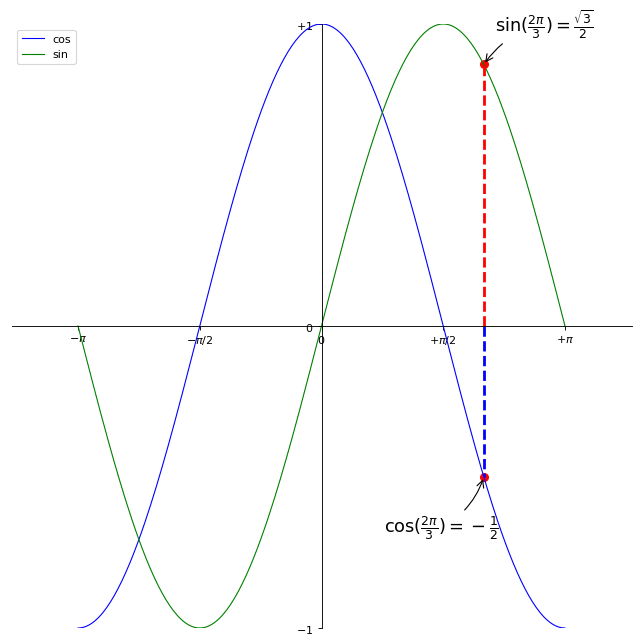

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 基本配置
plt.figure(figsize = (10, 10), dpi = 80)
plt.xlim(-4.0, 4.0) # 坐标上下限
plt.ylim(-1.0, 1.0)
'''
plt.xticks(np.linspace(-4, 4, 9, endpoint = True))
plt.yticks(np.linspace(-1, 1, 5, endpoint = True))
'''
# 更直观的记号
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$'])

# 画曲线
X = np.linspace(-np.pi, np.pi, 256,endpoint = True)
Cos,Sin = np.cos(X), np.sin(X)
plt.plot(X, Cos, color = 'blue', linewidth = 1.0, linestyle = '-', label = 'cos') # label添加图例
plt.plot(X, Sin, color = 'green', linewidth = 1.0, linestyle = '-', label = 'sin')
plt.legend(loc='upper left') # 图例位置左上角

# 移动坐标
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# 给特殊点加注释
t = 2*np.pi/3
plt.plot([t, t],[0, np.cos(t)], color = 'blue', linewidth = 2.5, linestyle = '--')
plt.scatter([t, ],[np.cos(t),], 50, color ='red')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
            xy = (t, np.cos(t)), xycoords = 'data',
            xytext = (-90, -50), textcoords = 'offset points', fontsize = 16,
            arrowprops = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=.2'})
plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy = (t, np.sin(t)), xycoords = 'data',
            xytext = (+10, +30), textcoords = 'offset points', fontsize = 16,
            arrowprops = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=.2'})

# 显示图片
plt.show()


## 股票案例

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tushare as ts

'''
#获取数据
s_pf='600000'
s_gd='601818'
sdate='2016-01-01'
edate='2016-12-31'

df_pf=ts.get_h_data(s_pf,start=sdate,end=edate).sort_index(axis=0,ascending=True)
df_gd=ts.get_h_data(s_gd,start=sdate,end=edate).sort_index(axis=0,ascending=True)

df = pd.concat([df_pf.close,df_gd.close],axis=1,keys=['pf_close','gd_close'])

#填充数据
df.ffill(axis=0,inplace=True)   
df.to_csv('pf_gd.csv')
'''

#对应csv的读取
df=pd.read_csv('pf_gd.csv')

'''
corr=df.corr(method='pearson',min_periods=1)
print(corr)

df.plot(figsize=(20,12))
plt.savefig('pf_gd.jpg')
plt.close()
'''


df['pf_one']=df.pf_close/float(df.pf_close[0])*100
df['gd_one']=df.gd_close/float(df.gd_close[0])*100
df.pf_one.plot(figsize=(20,12))
df.gd_one.plot(figsize=(20,12))
plt.savefig('pf_gd_one.jpg')
plt.close()